# Importing Libraries

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://docs.google.com/spreadsheets/d/127ejj-lQYGT23W5Rh4v1q3DxLS7-nYFO9Fg9VZIQyjM/export?format=csv")

In [26]:
display(df.head())

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [27]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# 1. Data Cleaning

In [28]:
# standardizing columns names
df.columns = df.columns.str.lower().str.replace(' ', '_')

## 1.1. Handle Missing Data
*   Identify if there are missing values
*   Decide how to handle missing data for each column (e.g., fill with appropriate values, drop rows, etc.).

In [29]:
# Check missing values
print("Any missing values?")
print(df.isnull().any())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nPercentage of missing values per column:")
print(df.isnull().mean() * 100)

Any missing values?
make                 False
model                False
year                 False
engine_fuel_type      True
engine_hp             True
engine_cylinders      True
transmission_type    False
driven_wheels        False
number_of_doors       True
market_category       True
vehicle_size         False
vehicle_style        False
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

Missing values per column:
make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Percentage of missing values per column:
make                  0.000000
model 

In [30]:
# Drop rows with missing values in critical columns
# (share of missing values is negligible)

df = df.dropna(subset=[
    'engine_fuel_type',
    'engine_hp',
    'engine_cylinders',
    'number_of_doors'
])


In [31]:
# 'Market Category' has a high proportion of missing values.
# Missing entries are replaced with 'unknown' to preserve data while keeping them identifiable.

df['market_category'] = df['market_category'].fillna('unknown')

## 1.2. Data Type Conversion

*   Ensure that columns are of the correct data type for analysis (e.g., ensure that 'Year' is an integer or float).

In [32]:
#checking datatypes
print(df.dtypes)

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object


'year' is already of integer type (int64), no conversion needed

## 1.3. Filter Data

* Filter the dataset to only include cars from the year 1995 and later.

In [33]:
df_filtered = df[df['year'] >= 1995]

## 1.4. String Operations
Standardize text entries by converting these columns' entries to lowercase:
* Vehicle Style
* Market Category

In [34]:
df_filtered = df_filtered.copy()
for column in ['vehicle_style', 'market_category']:
    df_filtered[column] = df_filtered[column].str.lower()

# 2. Feature Engineering

## 2.1. Create New Columns
* Create a column called Total MPG that is the average of city mpg and highway MPG.
* Create a column called Price per HP calculated as:
MSRP / Engine HP.

In [35]:
# 1. total_mpg
df_filtered['total_mpg'] = (df_filtered['city_mpg'] + df_filtered['highway_mpg']) / 2

# 2. price_per_hp
df_filtered['price_per_hp'] = df_filtered['msrp'] / df_filtered['engine_hp']

In [36]:
print(df_filtered.head())

  make       model  year             engine_fuel_type  engine_hp  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory tuner,luxury,high-performance      Compact         c

# 3. Exploratory Data Analysis (EDA)

## 3.1. Descriptive Statistics
Calculate summary statistics (mean, median, standard deviation) for the following columns:
* Engine HP, MSRP, Popularity, highway MPG, and city mpg.

In [37]:
columns = ['engine_hp', 'msrp', 'popularity', 'highway_mpg', 'city_mpg']
summary_stats = df_filtered[columns].agg(['mean', 'median', 'std']).round(2)
print(summary_stats)

        engine_hp      msrp  popularity  highway_mpg  city_mpg
mean       256.86  43434.31     1568.01        26.53     19.47
median     240.00  31265.00     1385.00        26.00     18.00
std        108.75  61540.31     1452.13         7.53      6.65


## 3.2. Group Analysis
Group the data by the following columns and calculate the average MSRP and Popularity for each group:
* Driven_Wheels
* Vehicle Size
* Engine Cylinders

In [38]:
group_driven_wheels = df_filtered.groupby('driven_wheels')[['msrp', 'popularity']].mean().round(2)
group_vehicle_size = df_filtered.groupby('vehicle_size')[['msrp', 'popularity']].mean().round(2)
group_engine_cylinders = df_filtered.groupby('engine_cylinders')[['msrp', 'popularity']].mean().round(2)

print(group_driven_wheels)
print(group_engine_cylinders)
print(group_engine_cylinders)

                       msrp  popularity
driven_wheels                          
all wheel drive    59397.28     1510.26
four wheel drive   38460.88     1760.02
front wheel drive  24651.96     1397.78
rear wheel drive   60469.09     1775.52
                        msrp  popularity
engine_cylinders                        
0.0                 34511.92     1986.54
3.0                 13547.00      791.95
4.0                 25548.03     1435.98
5.0                 22858.33      856.42
6.0                 36503.34     1694.27
8.0                 65559.78     1756.04
10.0               184123.82     1830.03
12.0               290142.19      830.33
16.0              1757223.67      820.00
                        msrp  popularity
engine_cylinders                        
0.0                 34511.92     1986.54
3.0                 13547.00      791.95
4.0                 25548.03     1435.98
5.0                 22858.33      856.42
6.0                 36503.34     1694.27
8.0                 65

## 3.3. Visualizations:
Generate the following visualizations:
* A histogram that shows a distribution for the city mpg column.
* A bar chart showing the average MSRP for each category in Vehicle Size.
* A scatter plot showing the relationship between Engine HP and MSRP.
* A boxplot showing the distribution of MSRP for each category in Driven_Wheels.
* A line plot showing trends in average city mpg and highway MPG for different Transmission Type.

### Histogram: Distribution of City MPG

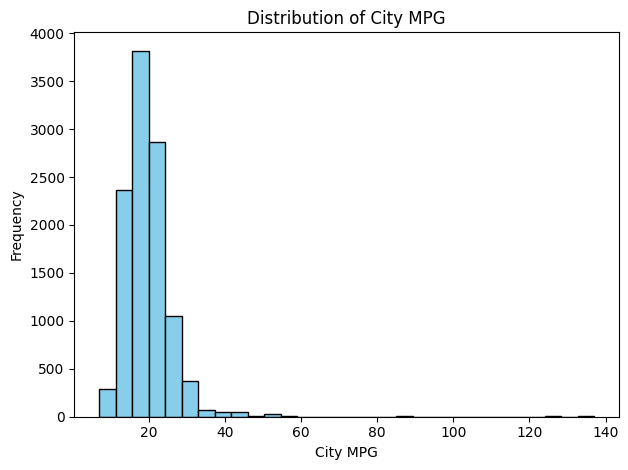

In [39]:
plt.hist(
	df_filtered['city_mpg'],
	bins=30,
	alpha=1,
	edgecolor='black',
	color='skyblue')

plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.title('Distribution of City MPG')

plt.tight_layout()
plt.show()


### Bar Chart: Avg MSRP for each Vehicle Size


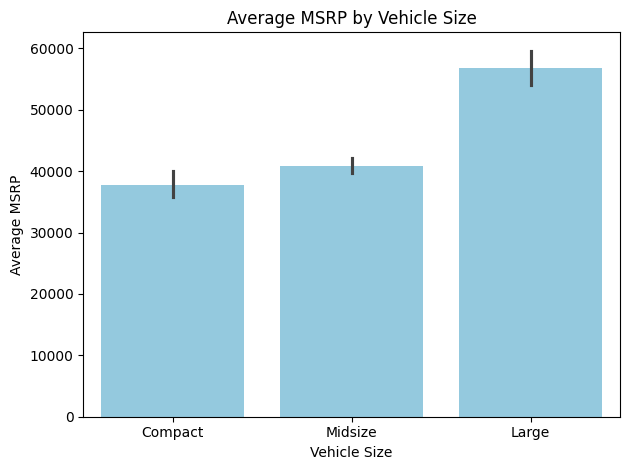

In [40]:
sns.barplot(data=df_filtered, x='vehicle_size', y='msrp', estimator='mean', color='skyblue')
plt.xlabel('Vehicle Size')
plt.ylabel('Average MSRP')
plt.title('Average MSRP by Vehicle Size')

plt.tight_layout()
plt.show()

### Scatter Plot: Engine HP & MSRP


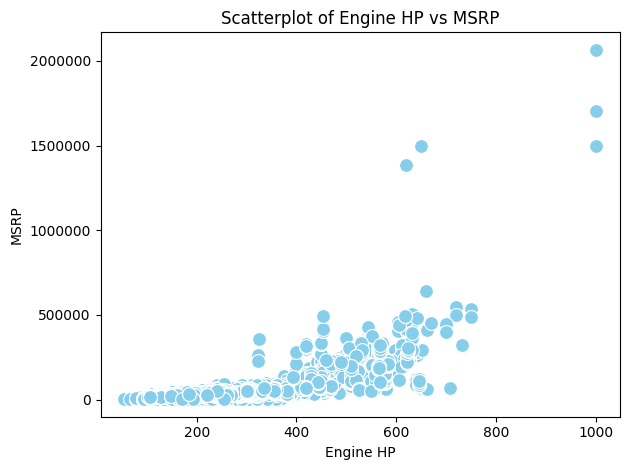

In [41]:
sns.scatterplot(
    x='engine_hp',
    y='msrp',
    data=df_filtered,
    color='skyblue',
    marker='o',
    s=100
)
plt.title('Scatterplot of Engine HP vs MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')

# formatting y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

### Box Plots: distribution of MSRP for each category in Driven Wheels

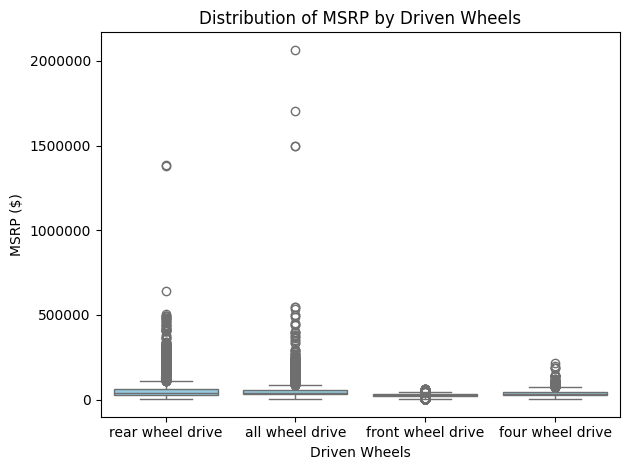

In [42]:
sns.boxplot(
    data=df_filtered,
    x='driven_wheels',
    y='msrp',
    color="skyblue")

plt.xlabel('Driven Wheels')
plt.ylabel('MSRP ($)')
plt.title("Distribution of MSRP by Driven Wheels")

# formatting y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

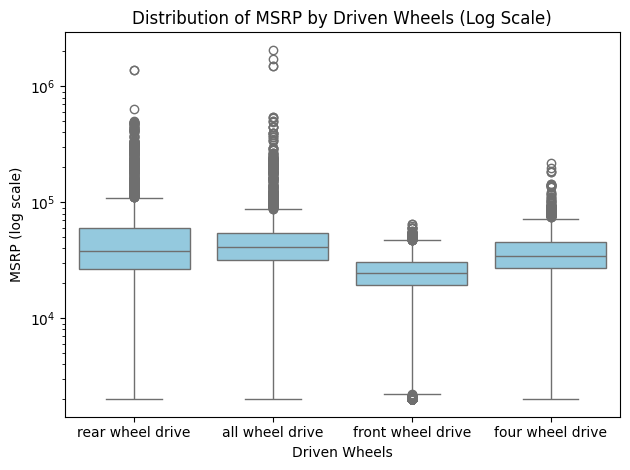

In [46]:
sns.boxplot(
    data=df_filtered,
    x="driven_wheels",
    y="msrp",
    color="skyblue"
)

plt.yscale("log")
plt.title("Distribution of MSRP by Driven Wheels (Log Scale)")
plt.xlabel("Driven Wheels")
plt.ylabel("MSRP (log scale)")
plt.tight_layout()
plt.show()


### Line Plot: Trends in avg City MPG and Highway MPG for Transmission Types

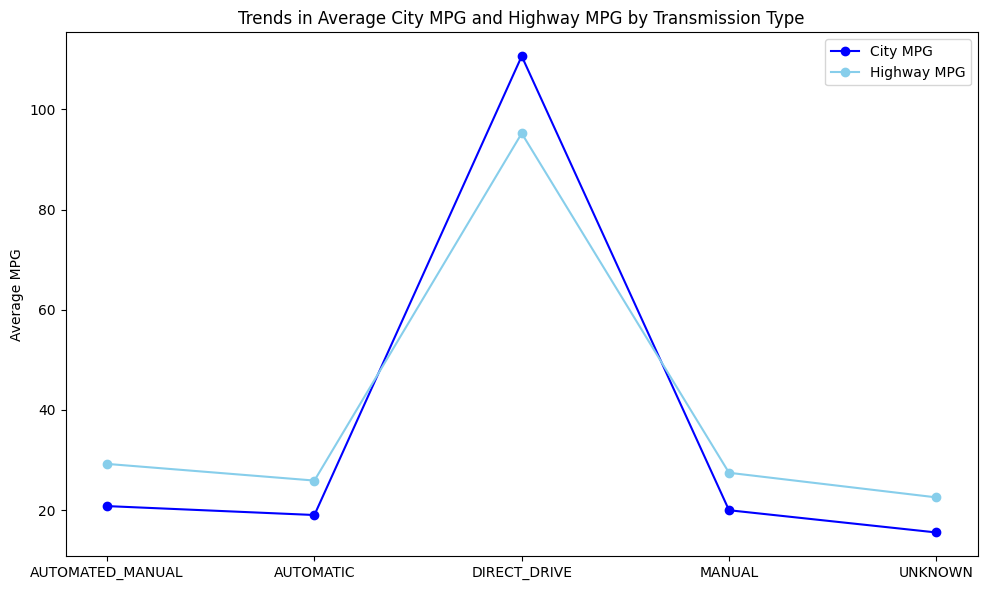

In [44]:
avg_mpg = df_filtered.groupby('transmission_type')[['city_mpg', 'highway_mpg']].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_mpg['transmission_type'], avg_mpg['city_mpg'], marker='o', label='City MPG', color='blue')
plt.plot(avg_mpg['transmission_type'], avg_mpg['highway_mpg'], marker='o', label='Highway MPG', color='skyblue')

#plt.xlabel('Transmission Type')
plt.ylabel('Average MPG')
plt.title('Trends in Average City MPG and Highway MPG by Transmission Type')
plt.legend()

plt.tight_layout()
plt.show()

## 3.4. Correlation Analysis
Investigate the correlation between the following variables:
* Engine HP, MSRP, Popularity, city mpg, and highway MPG.

             engine_hp      msrp  popularity  city_mpg  highway_mpg
engine_hp     1.000000  0.654161    0.030604 -0.497366    -0.451302
msrp          0.654161  1.000000   -0.057331 -0.246801    -0.225431
popularity    0.030604 -0.057331    1.000000 -0.011671    -0.030835
city_mpg     -0.497366 -0.246801   -0.011671  1.000000     0.843070
highway_mpg  -0.451302 -0.225431   -0.030835  0.843070     1.000000


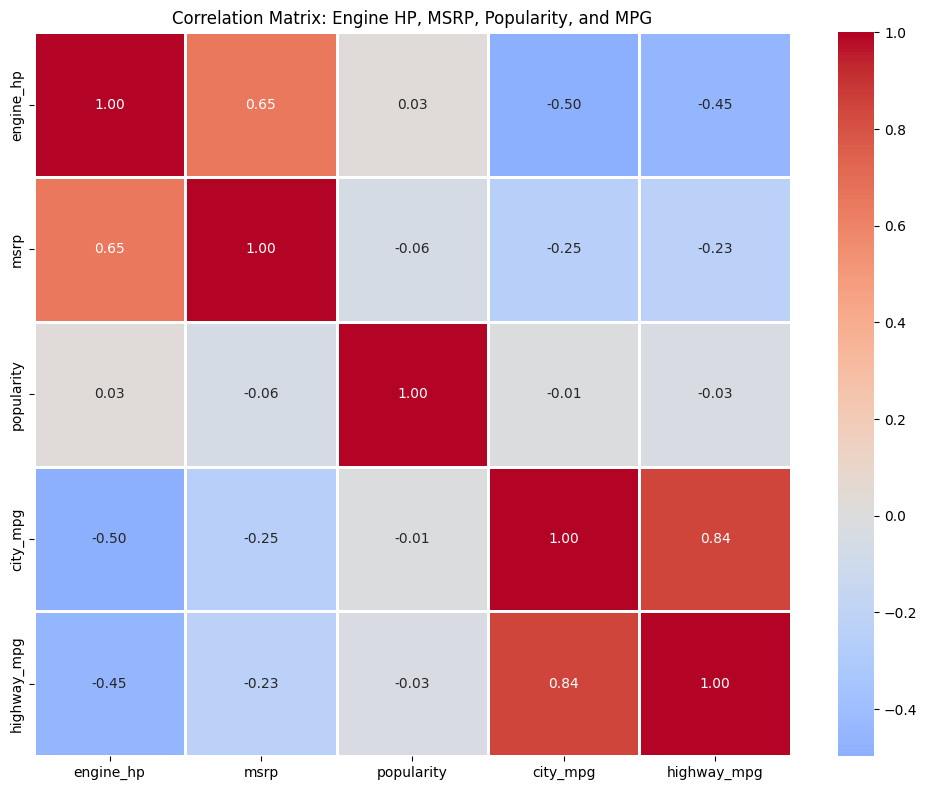

In [45]:
# Selecting columns
correlation_cols = ['engine_hp', 'msrp', 'popularity', 'city_mpg', 'highway_mpg']

# Calculating correlation matrix
correlation_matrix = df_filtered[correlation_cols].corr()

print(correlation_matrix)

# Creating Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,           # Display correlation coefficients inside the heatmap cells
            cmap='coolwarm',      # Color schema
            center=0,             # Centers the color palette at 0 (neutral point)
            fmt='.2f',            # Format: 2 Decimals
            linewidths=1)

plt.title('Correlation Matrix: Engine HP, MSRP, Popularity, and MPG')

plt.tight_layout()
plt.show()

# Summary & Key Insights

This analysis examined a comprehensive car dataset including vehicles from model year 1995 onwards, with the objective of identifying relationships between vehicle characteristics, pricing, and fuel efficiency. After cleaning the data and handling missing values appropriately, new features such as Total MPG and Price per HP were created to support deeper analysis.

Key insights from the exploratory analysis include:


- Vehicle pricing varies strongly by configuration:

  - Larger vehicles tend to have higher average MSRPs.
  - Cars with rear-wheel drive (RWD) and all-wheel drive (AWD) are significantly more expensive than front-wheel drive (FWD) vehicles.
  - On average, AWD vehicles cost more than twice as much as FWD vehicles.

- Engine performance is a major driver of price:

  - Engine horsepower shows a moderate to strong positive correlation with MSRP (r ≈ 0.65).
  - Higher horsepower vehicles are consistently associated with higher prices.

- Performance and fuel efficiency exhibit clear trade-offs:
  - Engine horsepower is negatively correlated with city MPG (r ≈ −0.50), indicating reduced fuel efficiency as performance increases.
  - City MPG and highway MPG are strongly correlated with each other (r ≈ 0.84).

- Transmission type influences fuel efficiency trends:
  - Average city and highway MPG values vary across transmission types, suggesting that transmission choice plays a role in overall efficiency.

Overall, the analysis demonstrates that vehicle price is closely linked to performance characteristics and drivetrain decisions, while fuel efficiency reflects design trade-offs between power, size, and vehicle configuration.